# Домашнее задание по дисциплине «Методы машинного обучения»

## Ход работы:

### 1) Поиск и выбор набора данных для построения модели машинного обучения. На основе выбранного набора данных строится модель машинного обучения для решения или задачи классификации, или задачи регрессии.

### 2) Для выбранного датасета (датасетов) на основе материалов лекций, в целях улучшения выборки, решить следующие задачи (если это необходимо в данном датасете):

- устранение пропусков в данных;
- кодирование категориальных признаков;
- нормализацию числовых признаков;
- масштабирование признаков;
- обработку выбросов для числовых признаков;
- обработку нестандартных признаков (которые не является числовым или категориальным);
-отбор признаков, наиболее подходящих для построения модели;
- устранение дисбаланса классов в случае решения задачи классификации на дисбалансированной выборке.

### 3) Обучить модель и оценить метрики качества для двух выборок :
исходная выборка, которая содержит только минимальную предобработку данных, необходимую для построения модели (например, кодирование категориальных признаков).
улучшенная выборка, полученная в результате полной предобработки данных в пункте 2.

### 4)Построить модель с использованием произвольной библиотеки AutoML.

### 5)Сравнить метрики для трех полученных моделей.


In [ ]:
# !pip install category-encoders
# !pip install scikit-learn==0.23.0
# !pip install auto-sklearn==0.12.3
# !pip install imbalanced-learn==0.8.0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Датасет 

[ссылка](https://www.kaggle.com/kaggle/san-francisco-crime-classification?select=train.csv)

This dataset contains incidents derived from SFPD Crime Incident Reporting system. The data ranges from 1/1/2003 to 5/13/2015. The training set and test set rotate every week, meaning week 1,3,5,7… belong to test set, week 2,4,6,8 belong to training set. There are 9 variables:

- Dates - timestamp of the crime incident
- Category - category of the crime incident (only in train.csv).
- Descript - detailed description of the crime incident (only in train.csv)
- DayOfWeek - the day of the week
- PdDistrict - name of the Police Department District
- Resolution - how the crime incident was resolved (only in train.csv)
- Address - the approximate street address of the crime incident
- X - Longitude
- Y - Latitude

In [ ]:
!unzip crimeclf.zip

Archive:  crimeclf.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df = pd.read_csv('train.csv')
df.columns = [i.lower() for i in df.columns]
df

,dates,category,descript,dayofweek,pddistrict,resolution,address,x,y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [ ]:
df.category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [ ]:
df = df[(df.category == 'LARCENY/THEFT')| (df.category == 'ASSAULT') | (df.category == 'DRUG/NARCOTIC')]

In [ ]:
df.category.unique()

array(['LARCENY/THEFT', 'ASSAULT', 'DRUG/NARCOTIC'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305747 entries, 3 to 878046
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   dates       305747 non-null  object 
 1   category    305747 non-null  object 
 2   descript    305747 non-null  object 
 3   dayofweek   305747 non-null  object 
 4   pddistrict  305747 non-null  object 
 5   resolution  305747 non-null  object 
 6   address     305747 non-null  object 
 7   x           305747 non-null  float64
 8   y           305747 non-null  float64
dtypes: float64(2), object(7)
memory usage: 23.3+ MB


In [ ]:
df.category.value_counts()

LARCENY/THEFT    174900
ASSAULT           76876
DRUG/NARCOTIC     53971
Name: category, dtype: int64

## Анализ датасета

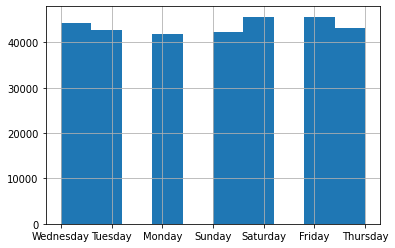

In [ ]:
df.dayofweek.hist()

In [ ]:
df['hour'] = df.dates.apply(lambda x: int(x.split()[1].split(':')[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


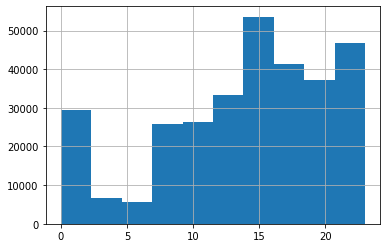

In [ ]:
df.hour.hist()

## Создадим фичи из даты преступления


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


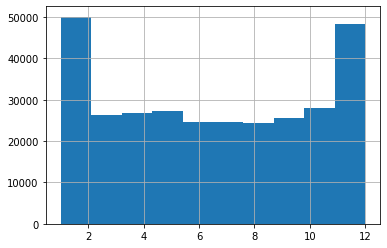

In [ ]:
df['month'] = df.dates.apply(lambda x: int(x.split()[0].split('-')[1]))
df.month.hist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


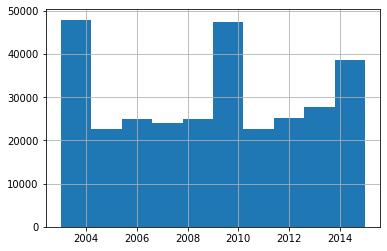

In [ ]:
df['year'] = df.dates.apply(lambda x: int(x.split()[0].split('-')[0]))
df.year.hist()

## Закодируем категориальные признаки

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


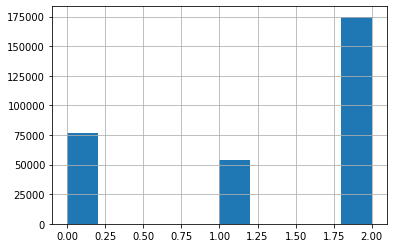

In [ ]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

# кодируем целевой признак
target_le = LabelEncoder()
df['target'] = target_le.fit_transform(df.category)
df.target.hist()

In [ ]:
df[df.resolution == 'NONE'].shape[0]  # количество неразрешенных преступлений

205952

In [ ]:
# кодируем разрешение конфликта
resolution_te = TargetEncoder()
df['resolution_encoded'] = resolution_te.fit_transform(df.resolution, df.target)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# кодируем день недели
wd_te = TargetEncoder()
df['week_day_encoded'] = wd_te.fit_transform(df.dayofweek, df.target)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#  кодируем район
district_te = TargetEncoder()
df['district_encoded'] = district_te.fit_transform(df.pddistrict, df.target)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df

,dates,category,descript,dayofweek,pddistrict,resolution,address,x,y,hour,month,year,target,resolution_encoded,week_day_encoded,district_encoded
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23,5,2015,2,1.543112,1.314488,1.489930
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23,5,2015,2,1.543112,1.314488,1.369634
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,23,5,2015,2,1.543112,1.314488,1.080551
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,23,5,2015,2,1.543112,1.314488,1.474741
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,23,5,2015,2,1.543112,1.314488,1.534336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878036,2003-01-06 00:55:00,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Monday,NORTHERN,NONE,1300 Block of WEBSTER ST,-122.431046,37.783030,0,1,2003,2,1.543112,1.310109,1.489930
878040,2003-01-06 00:33:00,ASSAULT,INFLICT INJURY ON COHABITEE,Monday,MISSION,NONE,2800 Block of FOLSOM ST,-122.414073,37.751685,0,1,2003,0,1.543112,1.310109,1.185528
878042,2003-01-06 00:20:00,ASSAULT,ATTEMPTED HOMICIDE WITH A GUN,Monday,BAYVIEW,"ARREST, BOOKED",1500 Block of SHAFTER AV,-122.389769,37.730564,0,1,2003,0,0.824472,1.310109,1.010705
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,0,1,2003,2,1.543112,1.310109,1.080551


In [ ]:
df.drop(columns=['descript', 'address', 'resolution', 'category', 'pddistrict', 'dates', 'dayofweek'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df

,x,y,hour,month,year,target,resolution_encoded,week_day_encoded,district_encoded
3,-122.426995,37.800873,23,5,2015,2,1.543112,1.314488,1.489930
4,-122.438738,37.771541,23,5,2015,2,1.543112,1.314488,1.369634
5,-122.403252,37.713431,23,5,2015,2,1.543112,1.314488,1.080551
8,-122.508194,37.776601,23,5,2015,2,1.543112,1.314488,1.474741
9,-122.419088,37.807802,23,5,2015,2,1.543112,1.314488,1.534336
...,...,...,...,...,...,...,...,...,...
878036,-122.431046,37.783030,0,1,2003,2,1.543112,1.310109,1.489930
878040,-122.414073,37.751685,0,1,2003,0,1.543112,1.310109,1.185528
878042,-122.389769,37.730564,0,1,2003,0,0.824472,1.310109,1.010705
878045,-122.447364,37.731948,0,1,2003,2,1.543112,1.310109,1.080551


## Используем SMOTE так как есть дисбаланс классов

In [ ]:
from imblearn.over_sampling import SMOTE

X = df[[i for i in df.columns if i!='target']]
y = df.target

smote = SMOTE(sampling_strategy='not majority', random_state=123)
X,y = smote.fit_resample(X, y)

## Проведем корреляционный анализ

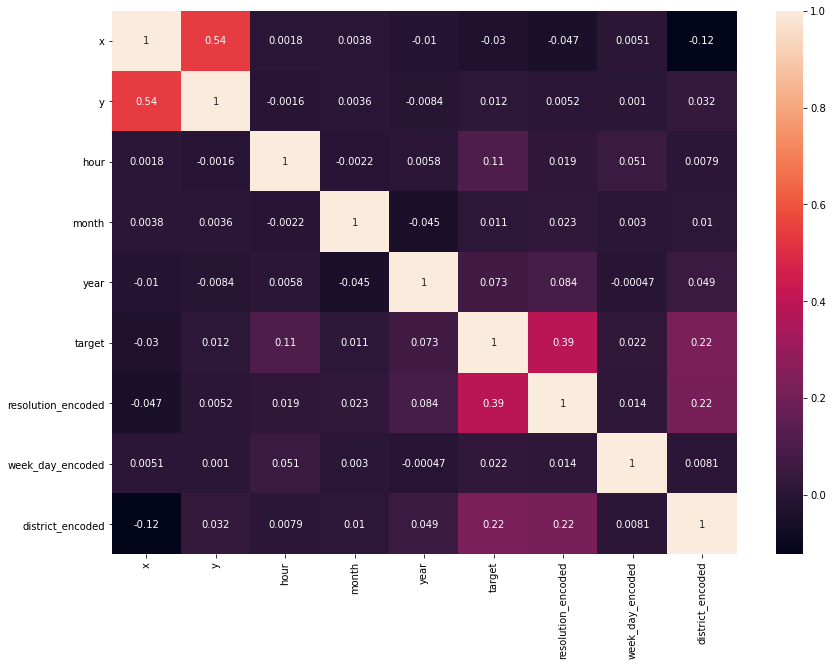

In [ ]:
plt.figure(figsize=(14, 10))
ax = sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# для устранения взаимныз корреляций убираем x (x и y коррелируют между собой и y коррелирует с target больше)
df.drop(columns=['y'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Разделим данные на тренировочную и тестовую выборки

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# X = df[[i for i in df.columns if i!='target']]
# y = df.target

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=123, stratify=y, test_size=0.15)

## Обучить модель и оценить метрики качества

### KNeighborsClassifier

In [ ]:
params = {'n_neighbors': [2, 3, 5, 7]}
knncls = KNeighborsClassifier()

knn_grid = GridSearchCV(knncls, params, n_jobs=-1, verbose=4, cv=3)

knn_grid.fit(x_train, y_train)

print(knn_grid.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.5min finished


{'n_neighbors': 3}


In [ ]:
knn_cls = KNeighborsClassifier(n_neighbors=3)
knncls.fit(x_train, y_train)
predicted_labels_knn = knncls.predict(x_test)

print(classification_report(y_test, predicted_labels_knn))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64     26235
           1       0.80      0.88      0.84     26235
           2       0.74      0.66      0.70     26235

    accuracy                           0.73     78705
   macro avg       0.72      0.73      0.72     78705
weighted avg       0.72      0.73      0.72     78705



### DecisionTree

In [ ]:
params = {'max_depth': [2, 3, 5, 7, 9]}
treeclf = DecisionTreeClassifier(random_state=123)

tree_grid = GridSearchCV(treeclf, params, n_jobs=-1, verbose=4, cv=3)

tree_grid.fit(x_train, y_train)

print(tree_grid.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    9.6s finished


{'max_depth': 9}


In [ ]:
treeclf = DecisionTreeClassifier(max_depth=9, random_state=123)

treeclf.fit(x_train, y_train)

predicted_labels_tree = treeclf.predict(x_test)

print(classification_report(y_test, predicted_labels_tree))

              precision    recall  f1-score   support

           0       0.67      0.47      0.55     26235
           1       0.74      0.86      0.80     26235
           2       0.72      0.83      0.77     26235

    accuracy                           0.72     78705
   macro avg       0.71      0.72      0.71     78705
weighted avg       0.71      0.72      0.71     78705



### RandomForest

In [ ]:
params = {
    'max_depth': [2, 3, 5, 7, 9],
    'n_estimators': [100, 150, 200]
          }
forestclf = RandomForestClassifier(random_state=123)

forest_grid = GridSearchCV(forestclf, params, n_jobs=-1, verbose=4, cv=3)
forest_grid.fit(x_train, y_train)

print(forest_grid.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 22.5min finished


{'max_depth': 9, 'n_estimators': 200}


In [ ]:
forestclf = RandomForestClassifier(max_depth=9, n_estimators=200, random_state=123)

forestclf.fit(x_train, y_train)
predicted_labels_forest = forestclf.predict(x_test)

print(classification_report(y_test, predicted_labels_forest))

              precision    recall  f1-score   support

           0       0.70      0.44      0.54     26235
           1       0.73      0.89      0.80     26235
           2       0.72      0.83      0.77     26235

    accuracy                           0.72     78705
   macro avg       0.72      0.72      0.70     78705
weighted avg       0.72      0.72      0.70     78705



## Обучение AutoML

In [ ]:
from autosklearn import classification

automlcls = classification.AutoSklearnClassifier(time_left_for_this_task=1200, n_jobs=-1)
automlcls.fit(x_train, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
  File "/usr/local/lib/python3.7/dist-packages/pynvml.py", line 799, in nvmlDeviceGetCount
    _nvmlCheckReturn(ret)
  File "/usr/local/lib/python3.7/dist-packages/pynvml.py", line 310, in _nvmlCheckReturn
    raise NVMLError(ret)
pynvml.NVMLError_Uninitialized: Uninitialized
tornado.application - ERROR - Exception in callback <bound method SystemMonitor.update of <SystemMonitor: cpu: 12 memory: 719 MB fds: 120>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tornado/ioloop.py", line 1229, in _run
    return self.callback()
  File "/usr/local/lib/python3.7/dist-packages/distributed/system_monitor.py", line 96, in update
    gpu_extra = nvml.one_time()
  File "/usr/local/lib/python3.7/dist-packages/distributed/diagnostics/nvml.py", line 45, in one_time
    h = _pynvml_handles()
  File "/usr/local/lib/python3.7/dist-packages/distributed/diagnostics/nvml.py", line 20, in _pynvml_handles


AutoSklearnClassifier(n_jobs=-1, per_run_time_limit=240,
                      time_left_for_this_task=1200)

In [ ]:
automl_predict = automlcls.predict(x_test)

print(classification_report(y_test, automl_predict))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50     26235
           1       0.00      0.00      0.00     26235
           2       0.00      0.00      0.00     26235

    accuracy                           0.33     78705
   macro avg       0.11      0.33      0.17     78705
weighted avg       0.11      0.33      0.17     78705



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Итоги обучения



На данных без сгенерированных фич и подготовки обучать не стал, в связи с прогнозируемым полным провалом обучения моделей

Лучше всех себя показал KNeighborsClassifier  с количеством соседей равным 3

AutmoML с данным ему времененем на подбор алгоритма в 20мин справился значительно хуже всех алгоритмов, делаем вывод, что с учетом размера датасета ему нужно значительно (в разы) больше времени чтобы подобрать подходящий алгоритм